## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch
from matplotlib.transforms import Bbox
from matplotlib.lines import Line2D

## Load data

In [10]:
# load simulation data

sample_files = np.array(['1bold 0.csv','1bold 1.csv','1bold 2.csv','1bold 4.csv',#1 0 1/3 1/3
                         '2bold 0.csv','2bold 1.csv','2bold 2.csv','2bold 4.csv',#a=2b 1 0 1/2 1/4
                         '3bold 0.csv','3bold 1.csv','3bold 2.csv','3bold 4.csv',#a=4b 1 0 2/3 1/6
                         '4bold 0.csv','4bold 1.csv','4bold 2.csv','4bold 4.csv',#2a=b 1 0 0.2 0.4
                         '5bold 0.csv','5bold 1.csv','5bold 2.csv','5bold 4.csv',#4a=b 1 0 1/9 4/9
                         '6bold 0.csv','6bold 1.csv','6bold 2.csv','6bold 4.csv',#0.25 * 1 0 1/3 1/3
                         '7bold 0.csv','7bold 1.csv','7bold 2.csv','7bold 4.csv',#0.5 * 1 0 1/3 1/3
                         '8bold 0.csv','8bold 1.csv','8bold 2.csv','8bold 4.csv',#0.75 * 1 0 1/3 1/3
                         '9bold 0.csv','9bold 1.csv','9bold 2.csv','9bold 4.csv',#1 0 0 1
                         '10bold 0.csv','10bold 1.csv','10bold 2.csv','10bold 4.csv',#1 0.2 0.2 1
                         '11bold 0.csv','11bold 1.csv','11bold 2.csv','11bold 4.csv'])#1 0 0.2 0.2
n_cases = 11
dummy_files = np.tile(sample_files[:4],int((n_cases*4-len(sample_files))/4))
list_files = np.concatenate((sample_files,dummy_files))

file_map = np.transpose(np.reshape(list_files,(-1,4)))

list_bold = []
for file in file_map.flatten():
    bold = pd.read_csv('../data/'+file,header=[0],index_col=0)
    list_bold.append(bold)

## Result 1: 4 panels adaptation

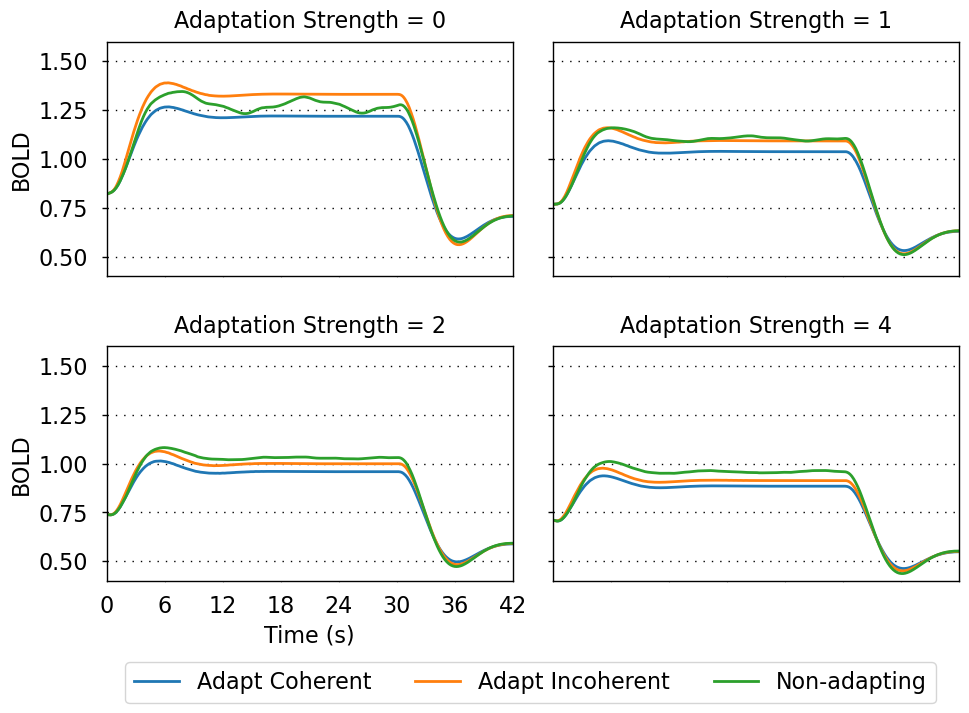

In [11]:
# plot 4 panels adaptation

bold_0 = list_bold[2]
bold_1 = list_bold[int(2+n_cases)]
bold_2 = list_bold[int(2+2*n_cases)]
bold_4 = list_bold[int(2+3*n_cases)]

ymax = 1.6
ymin = 0.4
T = bold_0.index[-1]

size_labels = 16

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(11,7)
plt.subplots_adjust(wspace=0.1,hspace=0.3)

for ax in (ax1,ax2,ax3,ax4):
    ax.set_xlim([0,T])
    ax.set_xticks(np.arange(0,T+1,6000))
    if ax == ax3:
        ax.set_xticklabels([0,6,12,18,24,30,36,42],fontsize=size_labels)
        ax.set_xlabel('Time (s)',fontsize=size_labels)
        ax.set_ylabel('BOLD',fontsize=size_labels)
    elif ax == ax1:
        ax.set_xticklabels([])
        ax.set_ylabel('BOLD',fontsize=size_labels)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.set_ylim([ymin,ymax])
    ax.set_facecolor('white')
    ax.spines[['bottom','left','top','right']].set_linewidth(1)
    ax.tick_params(axis='x', pad=10, length=0.5)
    ax.tick_params(axis='y', pad=10, labelsize=size_labels, length=3.5, width=1)
    ax.grid(axis='y',c='k',ls=(0,(1,5)),lw=1)
conditions = ['coherent','incoherent','nonadapting']
labels = ['Adapt Coherent','Adapt Incoherent','Non-adapting']
titles = ['Adaptation Strength = 0','Adaptation Strength = 1','Adaptation Strength = 2','Adaptation Strength = 4']
for ax,bold,title in zip((ax1,ax2,ax3,ax4),(bold_0,bold_1,bold_2,bold_4),titles):
    for condition,label in zip(conditions,labels):
        ax.plot(bold[condition],label=label,lw=2)# insert [::15] after [condition] for sampling
        if ax == ax4:
            ax.legend(fontsize=size_labels,bbox_to_anchor=(0.97,-0.3),ncols=3)
        ax.set_title(title,size=size_labels,pad=10)

fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)
plt.savefig('fig1.pdf',bbox_inches='tight',transparent=False)

## Result 2: MAE

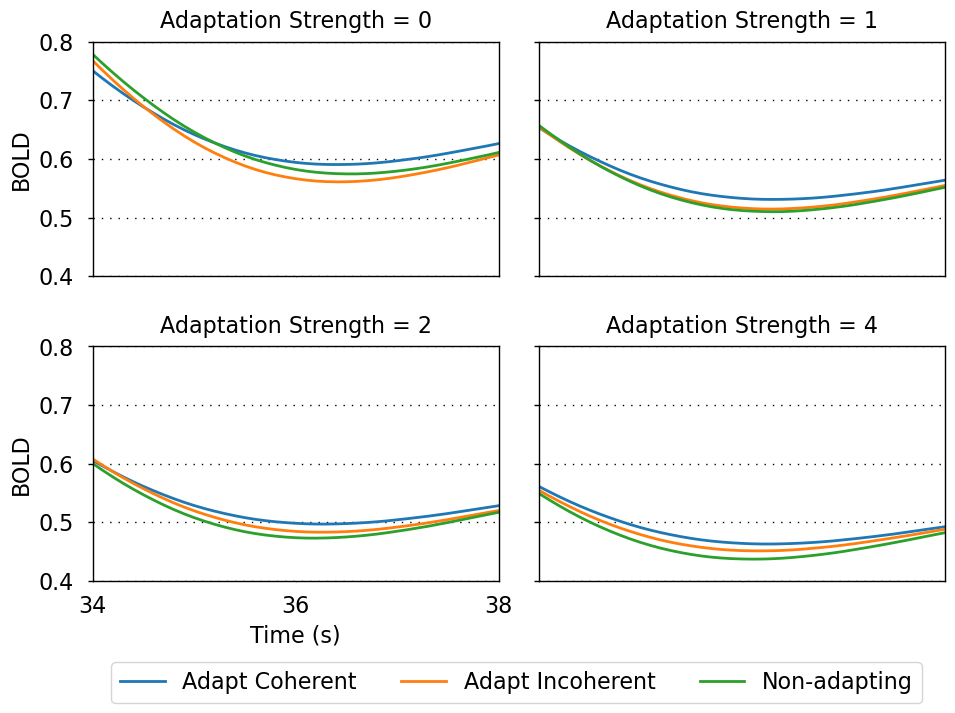

In [12]:
# plot 4 panels adaptation

bold_0 = list_bold[2]
bold_1 = list_bold[int(2+n_cases)]
bold_2 = list_bold[int(2+2*n_cases)]
bold_4 = list_bold[int(2+3*n_cases)]

ymin = 0.4
ymax = 0.8
xmin = 34000
xmax = 38000
T = bold_0.index[-1]

size_labels = 16

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(11,7)
plt.subplots_adjust(wspace=0.1,hspace=0.3)

for ax in (ax1,ax2,ax3,ax4):
    ax.set_xlim([xmin,xmax])
    ax.set_xticks(np.arange(xmin,xmax+1,2000))
    if ax == ax3:
        ax.set_xticklabels([34,36,38],fontsize=size_labels)
        ax.set_xlabel('Time (s)',fontsize=size_labels)
        ax.set_ylabel('BOLD',fontsize=size_labels)
    elif ax == ax1:
        ax.set_xticklabels([])
        ax.set_ylabel('BOLD',fontsize=size_labels)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.set_ylim([ymin,ymax])
    ax.set_facecolor('white')
    ax.spines[['bottom','left','top','right']].set_linewidth(1)
    ax.tick_params(axis='x', pad=10, length=0.5)
    ax.tick_params(axis='y', pad=10, labelsize=size_labels, length=3.5, width=1)
    ax.grid(axis='y',c='k',ls=(0,(1,5)),lw=1)
conditions = ['coherent','incoherent','nonadapting']
labels = ['Adapt Coherent','Adapt Incoherent','Non-adapting']
titles = ['Adaptation Strength = 0','Adaptation Strength = 1','Adaptation Strength = 2','Adaptation Strength = 4']
for ax,bold,title in zip((ax1,ax2,ax3,ax4),(bold_0,bold_1,bold_2,bold_4),titles):
    for condition,label in zip(conditions,labels):
        ax.plot(bold[condition],label=label,lw=2)# insert [::15] after [condition] for sampling
        if ax == ax4:
            ax.legend(fontsize=size_labels,bbox_to_anchor=(0.97,-0.3),ncols=3)
        ax.set_title(title,size=size_labels,pad=10)

fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)
plt.savefig('fig2.pdf',bbox_inches='tight',transparent=False)

## Result 3: heatmaps

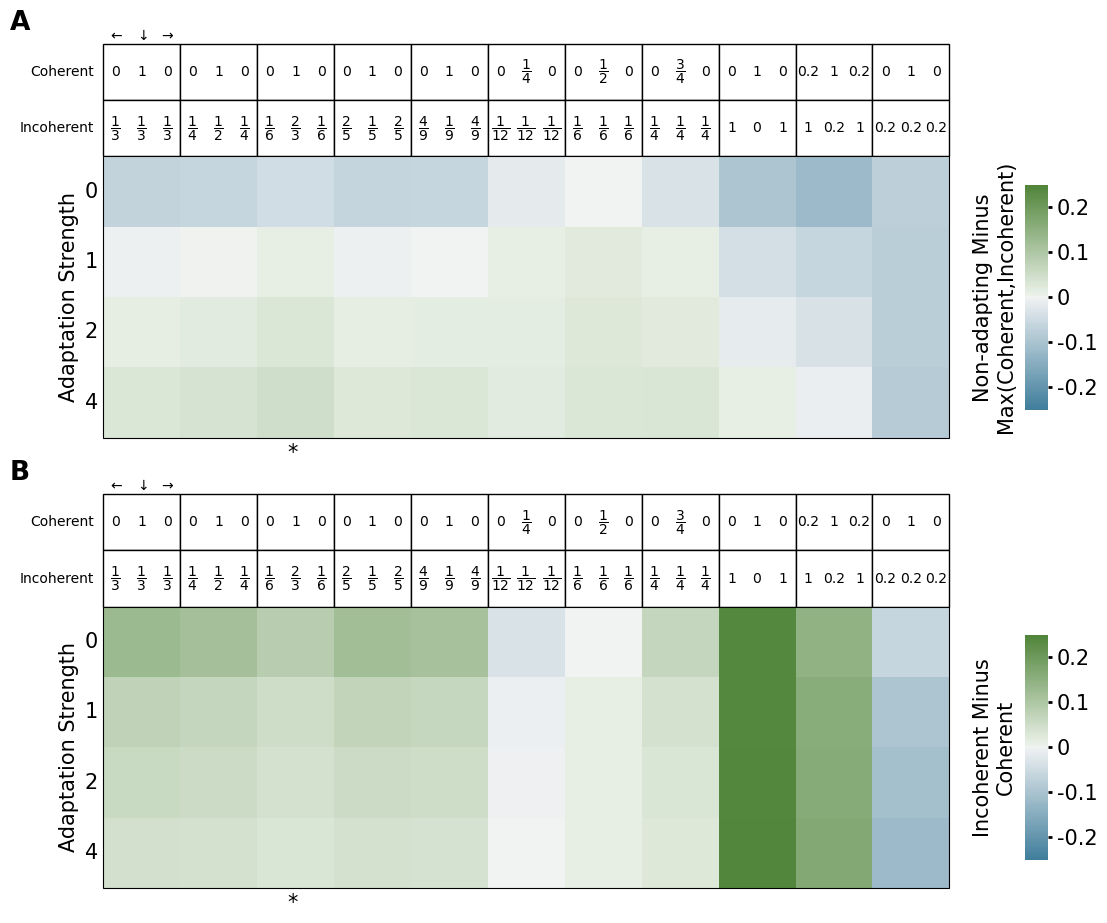

In [13]:
# ---------- define metrics heatmap ----------

### is non-adapting curve the top one

heat_max = []

for bold in list_bold:
    max_cond = np.maximum(bold['incoherent'].loc[6*1000:30*1000],bold['coherent'].loc[6*1000:30*1000])
    metric = ((bold['nonadapting'].loc[6*1000:30*1000] - max_cond)/bold['nonadapting'].loc[6*1000:30*1000]).mean()
    heat_max.append(metric)
heatlabel1 = 'Non-adapting Minus\nMax(Coherent,Incoherent)'

metric_map_max = np.reshape(heat_max,(4,-1))

### do the curves for coherent and incoherent conditions invert

heat_incoh = []

for bold in list_bold:
    metric = ((bold['incoherent'].loc[6*1000:30*1000] - bold['coherent'].loc[6*1000:30*1000])/bold['incoherent'].loc[6*1000:30*1000]).mean()
    heat_incoh.append(metric)
heatlabel2 = 'Incoherent Minus\nCoherent'

metric_map_inc = np.reshape(heat_incoh,(4,-1))

# ---------- create axes structure ----------

fig,(ax1,ax2) = plt.subplots(2,1)
fig.set_size_inches(14,9.5)
plt.subplots_adjust(hspace=0.6)

size_labels = 15
size_table = 10

# ---------- plot heatmap ----------

minheat = -0.25
maxheat = 0.25

heat = sns.heatmap(metric_map_max,ax=ax1,vmin=minheat,vmax=maxheat,cmap=sns.diverging_palette(230,120,as_cmap=True),
cbar_kws={'orientation': 'vertical','aspect':10,'shrink':0.8,'fraction':0.15,'pad':0.07},annot=False)

heat = sns.heatmap(metric_map_inc,ax=ax2,vmin=minheat,vmax=maxheat,cmap=sns.diverging_palette(230,120,as_cmap=True),
cbar_kws={'orientation': 'vertical','aspect':10,'shrink':0.8,'fraction':0.15,'pad':0.07},annot=False)

for ax,heatlabel,pad in zip((ax1,ax2),(heatlabel1,heatlabel2),(-90,-90)):
    ax.set_ylabel('Adaptation Strength',fontsize=size_labels)
    ax.set_yticks([0.5,1.5,2.5,3.5])
    ax.tick_params(axis='both',length=0)
    ax.set_yticklabels([0,1,2,4],rotation=0,fontsize=size_labels)
    ax.tick_params(top=True,labeltop=True,bottom=False,labelbottom=False)
    ax.set_xticks([0,1])

    cbar = ax.collections[0].colorbar
    cbar.ax.set_ylabel(heatlabel,labelpad=pad,fontsize=size_labels)
    cbar.ax.set_yticks([-0.2,-0.1,0,0.1,0.2])
    cbar.ax.set_yticklabels([-0.2,-0.1,0,0.1,0.2],fontsize=size_labels)
    cbar.ax.tick_params(axis='y',length=3,width=2)
    box1 = Rectangle((0,0),n_cases,4,ec='k',lw=0.8,fill=False,clip_on=False)
    ax.add_patch(box1)

# legend stimulus parameters

coherent_params = ['0','1','0',
                   '0','1','0',
                   '0','1','0',
                   '0','1','0',
                   '0','1','0',
                   '0',r'$\dfrac{1}{4}$','0',
                   '0',r'$\dfrac{1}{2}$','0',
                   '0',r'$\dfrac{3}{4}$','0',
                   '0','1','0',
                   '0.2','1','0.2',
                   '0','1','0']

incoherent_params = [r'$\dfrac{1}{3}$',r'$\dfrac{1}{3}$',r'$\dfrac{1}{3}$',
                     r'$\dfrac{1}{4}$',r'$\dfrac{1}{2}$',r'$\dfrac{1}{4}$',
                     r'$\dfrac{1}{6}$',r'$\dfrac{2}{3}$',r'$\dfrac{1}{6}$',
                     r'$\dfrac{2}{5}$',r'$\dfrac{1}{5}$',r'$\dfrac{2}{5}$',
                     r'$\dfrac{4}{9}$',r'$\dfrac{1}{9}$',r'$\dfrac{4}{9}$',
                     r'$\dfrac{1}{12}$',r'$\dfrac{1}{12}$',r'$\dfrac{1}{12}$',
                     r'$\dfrac{1}{6}$',r'$\dfrac{1}{6}$',r'$\dfrac{1}{6}$',
                     r'$\dfrac{1}{4}$',r'$\dfrac{1}{4}$',r'$\dfrac{1}{4}$',
                     '1','0','1',
                     '1','0.2','1',
                     '0.2','0.2','0.2']

table_text = [coherent_params,incoherent_params]

empty_line = np.tile(' ',n_cases)
table_edges_text = [empty_line,empty_line]

fill_line = np.tile(' ',int(n_cases*3-3))
arrows = [r'$\leftarrow$',r'$\downarrow$',r'$\rightarrow$']
columns = np.concatenate((arrows,fill_line))

for ax,label in zip((ax1,ax2),('A','B')):
    table_edges = ax.table(table_edges_text,loc='top')
    table = ax.table(table_text,loc='top',cellLoc='center',edges='open',
                  rowLabels=['Coherent','Incoherent'],colLabels=columns,rowLoc='right')
    table.auto_set_font_size(False)
    table.set_fontsize(size_table)

    ### set height table rows
    for row in range(1,len(table_text)+1):
        for col in range(-1,len(table_text[0])):
            cell = table[row,col]
            cell.set_height(0.2)

    for row in range(len(table_edges_text)):
        for col in range(len(table_edges_text[0])):
            cell = table_edges[row,col]
            cell.set_height(0.2)

    ax.annotate('*',(2.4,4.3),xycoords='data',fontsize=size_labels,annotation_clip=False)
    ax.annotate(label,(-1.21,-1.8),xycoords='data',fontsize=size_labels+4,weight='bold',annotation_clip=False)

# output and save figure
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)
plt.savefig('fig3.pdf',bbox_inches='tight',transparent=False,dpi=300)
plt.show()